**Foreward**

Dear Reader,

Thank you for taking the time to review and provide feedback on this report. Your input has been incredibly valuable in shaping our work.

Within this notebook, we've conducted some data analysis concerning an interesting real-world case study. Here, you'll discover how to use pandas data frames to read, manipulate, save, and generate data. Additionally, we've explored how simple scatter plots can be combined to present more comprehensive results in unique and straightforward graphs.

This report delves into the analysis of various traditional machine learning methods for Face Emotion Recognition (FER). It's important to note that the primary discussions have been formatted in a scientific paper, which, as of now, is not available to the public due to its unpublished status.

Among the key findings of this study are two significant achievements:
i) the development of a new method for extracting vectors from facial landmarks, and
ii) identifying which parts of the face play a significant role in expressing human emotion.

While there are restrictions on sharing the original datasets used in this work, the extracted vectors generated through the Zolfonoon method are shared within this notebook. Furthermore, you'll find explanations and discussions on what can be interpreted from the graphs presented in the subsequent sections of this report.

Thank you once again for your interest and participation in this study.

Sincerely,

Hosam Zolfonoon

**==========================================================================================**

**Part 1: Data Acqusition, Data Preprocessing, Model Trainng/Testing**

**==========================================================================================**

**==========================================================================================**

**Import and Install necessary libraries to start**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**==========================================================================================**

**Related codes**

In [ ]:
# Disable all warnings
warnings.filterwarnings("ignore")

In [ ]:
# Emotion Faunction 01
def emotion_folder_list01():
    emotion_folder_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Normal', 'Sad', 'Surprise']
    return emotion_folder_list

In [ ]:
# Function to generate landmrks list for depploting in the models No: 5
def detection_list_function_face_list05():
    max_min_list = [234, 454, 10, 5] # Left, Right, Top, Middle
    outer_lip = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 375, 321, 405, 314, 17, 84, 181, 91, 146]
    left_eye = [249, 263, 362, 373, 374, 380, 381, 382, 384, 385, 386, 387, 388, 390, 398, 466]
    left_eyebrow = [276, 282, 283, 285, 293, 295, 296, 300, 334, 336]
    right_eye = [7, 33, 133, 144, 145, 153, 154, 155, 157, 158, 159, 160, 161, 163, 173, 246]
    right_eyebrow = [46, 52, 53, 55, 63, 65, 66, 70, 105, 107]

    b = max_min_list+outer_lip+left_eye+left_eyebrow+right_eye+right_eyebrow#
    b.sort()
    detection_list = []
    [detection_list.append(i) for i in b if i not in detection_list] # it has 184 landmarks
    return detection_list

In [ ]:
def df_preprocessing(df, test_size_input):
    # Transform into a categorical variable
    df.emotion = pd.Categorical(df.emotion)
    # Assign a number to each category (label encoding)
    df.emotion = df.emotion.cat.codes
    # Transform into a categorical variable
    df['emotion'] = pd.Categorical(df['emotion'])
    # Assign a number to each category (label encoding)
    df['emotion'] = df['emotion'].cat.codes
    # Extract features (coordinates) by dropping the 'emotion' column
    coordinates = df.drop(['emotion'], axis=1)
        # Use to_categorical on your labels
    #emotions = to_categorical(df['emotion'])
    emotions = df['emotion']
    X_train_df_preprocessing, X_test_df_preprocessing, y_train_df_preprocessing, y_test_df_preprocessing = train_test_split(coordinates, emotions, test_size=test_size_input, random_state=42, shuffle=True)
    return  X_train_df_preprocessing, X_test_df_preprocessing, y_train_df_preprocessing, y_test_df_preprocessing

In [ ]:
def df_FER_results_function(y_test, y_pred, df_results, results_list, start_time):
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    stop_time = time.time()
    processing_time = stop_time - start_time
    start_time = stop_time
    results_list += [accuracy, precision, recall, processing_time]
    df_results.loc[len(df_results)] = results_list
    return df_results

In [ ]:
def mlp_training(data_set, mlp_training_df, X_train, X_test, y_train, y_test, emotion_range):
    mlp_solver_list = ['sgd', 'adam'] # ['sgd'] #['sgd', 'adam']
    mlp_activation_list = ['logistic', 'tanh', 'relu'] # ['relu'] #['logistic', 'tanh', 'relu']
    mlp_hidden_layer = [100] # [100] #[100,500,1000]
    mlp_iteration_list = [200] # [100] #[10, 100, 500]
    mlp_learning_rate_list = [0.001] # [0.002] #[.2, .02, .002]
    mlp_column_list = ['Data_set', 'Solver', 'Activation', 'Hidden', 'Iteration', 'Learning', 'Accuracy', 'Precision', 'Recall', 'Processing_time']
    mlp_df_results = pd.DataFrame(columns=mlp_column_list)
    start_time = time.time()
    for sl in mlp_solver_list:
        for al in mlp_activation_list:
            for hd in mlp_hidden_layer:
                for il in mlp_iteration_list:
                    for lrl in mlp_learning_rate_list:
                        # Create an MLP classifier with a linear kernel
                        mlp_classifier = MLPClassifier(hidden_layer_sizes=(hd,), max_iter=il, alpha=1e-4, solver=sl, random_state=1, learning_rate_init=lrl)
                        # Train the classifier on the training data
                        mlp_classifier.fit(X_train, y_train)
                        mlp_file_name = '/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/'+data_set+' MLP Emotions ' + str(emotion_range) + ' sl ' + str(sl) + ' al ' + str(al) + ' hd ' + str(hd) + ' il ' + str(il) + ' lrl ' + str(lrl) + ' ' + datetime.now().strftime('%Y%m%d %H%M%S')
                        # Save the trained model to a file
                        #joblib.dump(mlp_classifier, mlp_file_name + '.pkl')
                        # Make predictions on the test data
                        y_pred = mlp_classifier.predict(X_test)
                        mlp_title = 'MLP Emotions ' + str(emotion_range) + ' sl ' + str(sl) + ' al ' + str(al) # + ' hd ' + str(hd) + ' il ' + str(il) + ' lrl ' + str(lrl)
                        # Save the plot as a JPEG file
                        mlp_file_name = mlp_file_name +'.jpg'
                        #confusion_matix_FER_setup_function(y_test, y_pred, mlp_classifier, mlp_title, mlp_file_name)
                        mlp_results_list = [data_set, sl, al, hd, il, lrl]
                        mlp_df_results = df_FER_results_function(y_test, y_pred, mlp_df_results, mlp_results_list, start_time)
    mlp_training_df = pd.concat([mlp_training_df, mlp_df_results], ignore_index=True)
    mlp_training_df = mlp_training_df.drop(columns=['Precision', 'Recall'])
    return mlp_training_df


In [ ]:
def svm_traning(data_set, svm_training_df, X_train, X_test, y_train, y_test, emotion_range):
    svm_kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
    svm_column_list = ['Data_set', 'Kernel', 'Accuracy', 'Precision', 'Recall', 'Processing_time']
    svm_df_results = pd.DataFrame(columns=svm_column_list)
    start_time = time.time()
    for kl in svm_kernel_list:
        # Create an SVM classifier with a linear kernel
        svm_classifier = SVC(kernel=kl)
        # Train the classifier on the training data
        svm_classifier.fit(X_train, y_train)
        file_name = '/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/'+data_set+' SVM Emotions ' + str(emotion_range) + ' kl ' + str(kl) + ' ' + datetime.now().strftime('%Y%m%d %H%M%S')
        # Save the trained model to a file
        #joblib.dump(svm_classifier, file_name + '.pkl')
        # Make predictions on the test data
        y_pred = svm_classifier.predict(X_test)
        svm_title = 'SVM Emotions ' + str(emotion_range) + ' kl ' + str(kl)
        # Save the plot as a JPEG file
        svm_file_name = file_name +'.jpg'
        #confusion_matix_FER_setup_function(y_test, y_pred, svm_classifier, svm_title, svm_file_name)
        svm_results_list = [data_set,kl]
        svm_df_results = df_FER_results_function(y_test, y_pred, svm_df_results, svm_results_list, start_time)
    svm_training_df = pd.concat([svm_training_df, svm_df_results], ignore_index=True)
    svm_training_df = svm_training_df.drop(columns=['Precision', 'Recall'])
    return svm_training_df

In [ ]:
def dt_training(data_set, dt_training_df, X_train, X_test, y_train, y_test, emotion_range):
    dt_criterion = ['gini', 'entropy', 'log_loss']
    dt_splitter = ['best', 'random']
    dt_column_list = ['Data_set', 'Criterion', 'Splitter', 'Accuracy', 'Precision', 'Recall', 'Processing_time']
    dt_df_results = pd.DataFrame(columns=dt_column_list)
    start_time = time.time()
    for cr in dt_criterion:
        for sp in dt_splitter:
            # Create an DT classifier with a linear kernel
            dt_classifier = DecisionTreeClassifier(criterion=cr, splitter=sp)
            # Train the classifier on the training data
            dt_classifier.fit(X_train, y_train)
            file_name = '/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/'+data_set+' DT Emotions ' + str(emotion_range) + ' cr ' + str(cr) + ' sp ' + str(sp) + ' ' + datetime.now().strftime('%Y%m%d %H%M%S')
            # Save the trained model to a file
            #joblib.dump(dt_classifier, file_name + '.pkl')
            # Make predictions on the test data
            y_pred = dt_classifier.predict(X_test)
            dt_title = 'DT Emotions ' + str(emotion_range) + ' cr ' + str(cr) + ' sp ' + str(sp)
            # Save the plot as a JPEG file
            dt_file_name = file_name +'.jpg'
            #confusion_matix_FER_setup_function(y_test, y_pred, dt_classifier, dt_title, dt_file_name)
            dt_results_list = [data_set, cr, sp]
            dt_df_results = df_FER_results_function(y_test, y_pred, dt_df_results, dt_results_list, start_time)
    dt_training_df = pd.concat([dt_training_df, dt_df_results], ignore_index=True)
    dt_training_df = dt_training_df.drop(columns=['Precision', 'Recall'])
    return dt_training_df


In [ ]:
def rf_training(data_set, rf_training_df,X_train, X_test, y_train, y_test, emotion_range):
    rf_criterion = ['gini', 'entropy', 'log_loss']
    rf_column_list = ['Data_set', 'Criterion', 'Accuracy', 'Precision', 'Recall', 'Processing_time']
    rf_df_results = pd.DataFrame(columns=rf_column_list)
    start_time = time.time()
    for cr in rf_criterion:
        # Create an SVM classifier with a linear kernel
        rf_classifier = RandomForestClassifier(criterion=cr)
        # Train the classifier on the training data
        rf_classifier.fit(X_train, y_train)
        file_name = '/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/'+data_set+' RF Emotions ' + str(emotion_range) + ' cr ' + str(cr) + ' ' + datetime.now().strftime('%Y%m%d %H%M%S')
        # Save the trained model to a file
        #joblib.dump(rf_classifier, file_name + '.pkl')
        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)
        rf_title = 'RF Emotions ' + str(emotion_range) + ' cr ' + str(cr)
        # Save the plot as a JPEG file
        rf_file_name = file_name +'.jpg'
        #confusion_matix_FER_setup_function(y_test, y_pred, rf_classifier, rf_title, rf_file_name)
        rf_results_list = [data_set, cr]
        rf_df_results = df_FER_results_function(y_test, y_pred, rf_df_results, rf_results_list, start_time)
    rf_training_df = pd.concat([rf_training_df, rf_df_results], ignore_index=True)
    rf_training_df = rf_training_df.drop(columns=['Precision', 'Recall'])
    return rf_training_df


**==========================================================================================**

**Part 2: Drawing Plots**

**==========================================================================================**

In [ ]:
## Parameters can be altered as needed; otherwise, they remain at their default settings.
def plots_setting(cols=1, rows=1):
    fig, axs = plt.subplots(ncols=cols, nrows=rows, layout="tight", figsize=(11.7, 8.3), frameon=True) # Setting up subplots
    plt.rcParams.update({'font.size': 10})
    #plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['figure.dpi'] = 200
    return fig, axs

**Notification**

In some case the results are the same, to deal with this issue regarding plotting, different sizes are considered for scatter points. Accordingly, if some points have overlapped the first scatters have bigger size with different color are visible to the reader.

In [ ]:
def mlp_scatter_plot(ax, X, y01, y02, y03, x_label, y_label, scatter_title, color_list, activation_list): # Scatter_Plotn function
    ## Draw scatter plot in which s related to the size of circles and c related to the color of circles

    ax.scatter(X, y01, s=40, c=color_list[0])
    ax.scatter(X, y02, s=20, c=color_list[1])
    ax.scatter(X, y03, s=5, c=color_list[2])
    ax.legend(activation_list)
    ax.set_title(scatter_title)
    ax.plot(X, y01, c=color_list[0])
    ax.plot(X, y02, c=color_list[1])
    ax.plot(X, y03, c=color_list[2])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=45)


In [ ]:
def svm_scatter_plot(ax, X, y01, y02, y03, y04, x_label, y_label, scatter_title, color_list, activation_list): # Scatter_Plotn function
    # Draw scatter plot in which s related to the size of circles and c related to the color of circles
    ax.scatter(X, y01, s=60, c=color_list[0])
    ax.scatter(X, y02, s=40, c=color_list[1])
    ax.scatter(X, y03, s=20, c=color_list[2])
    ax.scatter(X, y04, s=5, c=color_list[3])
    ax.legend(activation_list)
    ax.set_title(scatter_title)
    ax.plot(X, y01, c=color_list[0])
    ax.plot(X, y02, c=color_list[1])
    ax.plot(X, y03, c=color_list[2])
    ax.plot(X, y04, c=color_list[3])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=45)


In [ ]:
def dt_scatter_plot(ax, X, y01, y02, y03, x_label, y_label, scatter_title, color_list, activation_list): # Scatter_Plotn function
    # Draw scatter plot in which s related to the size of circles and c related to the color of circles
    ax.scatter(X, y01, s=40, c=color_list[0])
    ax.scatter(X, y02, s=20, c=color_list[1])
    ax.scatter(X, y03, s=5, c=color_list[2])
    ax.legend(activation_list)
    ax.set_title(scatter_title)
    ax.plot(X, y01, c=color_list[0])
    ax.plot(X, y02, c=color_list[1])
    ax.plot(X, y03, c=color_list[2])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=45)


In [ ]:
def rf_scatter_plot(ax, X, y01, y02, y03, x_label, y_label, scatter_title, color_list, activation_list): # Scatter_Plotn function
    # Draw scatter plot in which s related to the size of circles and c related to the color of circles
    ax.scatter(X, y01, s=20, c=color_list[0])
    ax.scatter(X, y02, s=5, c=color_list[1])
    ax.legend(activation_list)
    ax.set_title(scatter_title)
    ax.plot(X, y01, c=color_list[0])
    ax.plot(X, y02, c=color_list[1])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.tick_params(axis='x', rotation=45)


In [ ]:
def mlp_analysis_function(mlp_training_df, color_list):
    solver_list = list(mlp_training_df['Solver'].unique())
    activation_list = list(mlp_training_df['Activation'].unique())
    results_features_list = ['Accuracy', 'Processing_time']
    fig, axs = plots_setting(cols=2, rows=2)
    ax_counter = 0
    for result_item in results_features_list:
        for solver_item in solver_list:
            ax = axs.flat[ax_counter]
            X = list(mlp_training_df['Data_set'].unique())
            y01 = list(mlp_training_df[(mlp_training_df['Solver']==solver_item) & (mlp_training_df['Activation']=='logistic')][result_item])
            y02 = list(mlp_training_df[(mlp_training_df['Solver']==solver_item) & (mlp_training_df['Activation']=='tanh')][result_item])
            y03 = list(mlp_training_df[(mlp_training_df['Solver']==solver_item) & (mlp_training_df['Activation']=='relu')][result_item])
            x_label = 'Data Set'
            y_label = result_item
            scatter_title = 'MLP '+'Solver: '+solver_item+', '+result_item+' Comparison'
            ## To have a better comparison of accuracy, it is necessary to set max y dimension 0-1, otherwise, plt will adjust y max based on max accuracy for the case
            if result_item == 'Accuracy':
                ax.set_ylim(0, 1)
            ## Processing time is completely different for each data set and each model, accordingly, this line is developed to setting up the maximum of y, sometimes it is necessary to have a better comparison with other models that their plots are in the same dimension but with different domain
            #elif result_item == 'Processing_time':
             #   ax.set_ylim(0, 60)
            ## If you want to see X & Ys which are using for plot I can Use this line od code, it is possible the sane line for other analysis function
            #print('n\X :', X, '\ny01 :', y01, '\ny02 :', y02, '\ny03 :', y03)
            mlp_scatter_plot(ax, X, y01, y02, y03, x_label, y_label, scatter_title, color_list, activation_list)
            ax_counter += 1
    plt.savefig('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/MLP Scatter '+datetime.now().strftime('%Y%m%d %H%M%S')+'.jpg')
    plt.show()
    print('\n\n=================================================================================================================')
    print('Figure 1: MLP scatter plot to compare accuracy and processing time regarding hyperparameters tuning')
    print('-----------------------------------------------------------------------------------------------------------------\n')


In [ ]:
def svm_analysis_function(svm_training_df, color_list):
    kernel_list = list(svm_training_df['Kernel'].unique())
    results_features_list = ['Accuracy', 'Processing_time']
    fig, axs = plots_setting(cols=2, rows=1)
    ax_counter = 0
    for result_item in results_features_list:
        ax = axs.flat[ax_counter]
        X = list(svm_training_df['Data_set'].unique())
        y01 = list(svm_training_df[(svm_training_df['Kernel']=='linear')][result_item])
        y02 = list(svm_training_df[(svm_training_df['Kernel']=='poly')][result_item])
        y03 = list(svm_training_df[(svm_training_df['Kernel']=='rbf')][result_item])
        y04 = list(svm_training_df[(svm_training_df['Kernel']=='sigmoid')][result_item])
        x_label = 'Data Set'
        y_label = result_item
        scatter_title = 'SVM '+result_item+' Comparison'
        ## To have a better comparison of accuracy, it is necessary to set max y dimension 0-1, otherwise, plt will adjust y max based on max accuracy for the case
        if result_item == 'Accuracy':
            ax.set_ylim(0, 1)
        ## Processing time is completely different for each data set and each model, accordingly, this line is developed to setting up the maximum of y, sometimes it is necessary to have a better comparison with other models that their plots are in the same dimension but with different domain
        #elif result_item == 'Processing_time':
         #   ax.set_ylim(0, 10)
        svm_scatter_plot(ax, X, y01, y02, y03, y04, x_label, y_label, scatter_title, color_list, kernel_list)
        ax_counter += 1
    plt.savefig('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/SVM Scatter '+datetime.now().strftime('%Y%m%d %H%M%S')+'.jpg')
    plt.show()
    print('\n\n=================================================================================================================')
    print('Figure 2: SVM scatter plot to compare accuracy and processing time regarding hyperparameters tuning')
    print('-----------------------------------------------------------------------------------------------------------------\n')

In [ ]:
def dt_analysis_function(dt_training_df, color_list):
    criterion_list = list(dt_training_df['Criterion'].unique())
    splitter_list = list(dt_training_df['Splitter'].unique())
    results_features_list = ['Accuracy', 'Processing_time']
    fig, axs = plots_setting(cols=2, rows=2)
    ax_counter = 0
    for result_item in results_features_list:
        for splitter_item in splitter_list:
            ax = axs.flat[ax_counter]
            X = list(dt_training_df['Data_set'].unique())
            y01 = list(dt_training_df[(dt_training_df['Criterion']=='gini') & (dt_training_df['Splitter']==splitter_item)][result_item])
            y02 = list(dt_training_df[(dt_training_df['Criterion']=='entropy') & (dt_training_df['Splitter']==splitter_item)][result_item])
            y03 = list(dt_training_df[(dt_training_df['Criterion']=='log_loss') & (dt_training_df['Splitter']==splitter_item)][result_item])
            x_label = 'Data Set'
            y_label = result_item
            scatter_title = 'DT '+'Solver: '+splitter_item+', '+result_item+' Comparison'
            ## To have a better comparison of accuracy, it is necessary to set max y dimension 0-1, otherwise, plt will adjust y max based on max accuracy for the case
            if result_item == 'Accuracy':
                ax.set_ylim(0, 1)
            ## Processing time is completely different for each data set and each model, accordingly, this line is developed to setting up the maximum of y, sometimes it is necessary to have a better comparison with other models that their plots are in the same dimension but with different domain
            #elif result_item == 'Processing_time':
             #   ax.set_ylim(0, 1.1)
            dt_scatter_plot(ax, X, y01, y02, y03, x_label, y_label, scatter_title, color_list, criterion_list)
            ax_counter += 1
    plt.savefig('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/DT Scatter '+datetime.now().strftime('%Y%m%d %H%M%S')+'.jpg')
    plt.show()
    print('\n\n=================================================================================================================')
    print('Figure 3: DT scatter plot to compare accuracy and processing time regarding hyperparameters tuning')
    print('-----------------------------------------------------------------------------------------------------------------\n')


In [ ]:
def rf_analysis_function(rf_training_df, color_list):
    criterion_list = list(rf_training_df['Criterion'].unique())
    results_features_list = ['Accuracy', 'Processing_time']
    fig, axs = plots_setting(cols=2, rows=1)
    ax_counter = 0
    for result_item in results_features_list:
        ax = axs.flat[ax_counter]
        X = list(rf_training_df['Data_set'].unique())
        y01 = list(rf_training_df[(rf_training_df['Criterion']=='gini')][result_item])
        y02 = list(rf_training_df[(rf_training_df['Criterion']=='entropy')][result_item])
        y03 = list(rf_training_df[(rf_training_df['Criterion']=='log_loss')][result_item])
        x_label = 'Data Set'
        y_label = result_item
        scatter_title = 'RF '+result_item+' Comparison'
        ## To have a better comparison of accuracy, it is necessary to set max y dimension 0-1, otherwise, plt will adjust y max based on max accuracy for the case
        if result_item == 'Accuracy':
            ax.set_ylim(0, 1)
        ## Processing time is completely different for each data set and each model, accordingly, this line is developed to setting up the maximum of y, sometimes it is necessary to have a better comparison with other models that their plots are in the same dimension but with different domain
        #elif result_item == 'Processing_time':
         #   ax.set_ylim(0, 30)
        rf_scatter_plot(ax, X, y01, y02, y03, x_label, y_label, scatter_title, color_list, criterion_list)
        ax_counter += 1
    plt.savefig('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/RF Scatter '+datetime.now().strftime('%Y%m%d %H%M%S')+'.jpg')
    plt.show()
    print('\n\n=================================================================================================================')
    print('Figure 4: RF scatter plot to compare accuracy and processing time regarding hyperparameters tuning')
    print('-----------------------------------------------------------------------------------------------------------------\n')

In [ ]:
def df_empty_generator():
    mlp_column_list = ['Data_set', 'Solver', 'Activation', 'Hidden', 'Iteration', 'Learning', 'Accuracy', 'Processing_time']
    mlp_training_df = pd.DataFrame(columns=mlp_column_list)
    svm_column_list = ['Data_set', 'Kernel', 'Accuracy', 'Processing_time']
    svm_training_df = pd.DataFrame(columns=svm_column_list)
    dt_column_list = ['Data_set', 'Criterion', 'Splitter', 'Accuracy', 'Processing_time']
    dt_training_df = pd.DataFrame(columns=dt_column_list)
    rf_column_list = ['Data_set', 'Criterion', 'Accuracy', 'Processing_time']
    rf_training_df = pd.DataFrame(columns=rf_column_list)
    return mlp_training_df, svm_training_df, dt_training_df, rf_training_df

In [ ]:
def df_main_generator(path_input, emotion_range, test_size_input):
    file_names_list = os.listdir(path_input)
    mlp_training_df, svm_training_df, dt_training_df, rf_training_df = df_empty_generator()
    for file_name in file_names_list:
        data_set = file_name[:-23]
        df = pd.read_csv(path_input+file_name)
        X_train, X_test, y_train, y_test = df_preprocessing(df, test_size_input)
        mlp_training_df = mlp_training(data_set, mlp_training_df, X_train, X_test, y_train, y_test, emotion_range)
        svm_training_df = svm_traning(data_set, svm_training_df, X_train, X_test, y_train, y_test, emotion_range)
        dt_training_df = dt_training(data_set, dt_training_df, X_train, X_test, y_train, y_test, emotion_range)
        rf_training_df = rf_training(data_set, rf_training_df, X_train, X_test, y_train, y_test, emotion_range)
    return mlp_training_df, svm_training_df, dt_training_df, rf_training_df

In [ ]:
def analyzing_start(mlp_training_df, svm_training_df, dt_training_df, rf_training_df):
    color_list = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
    mlp_analysis_function(mlp_training_df, color_list)
    svm_analysis_function(svm_training_df, color_list)
    dt_analysis_function(dt_training_df, color_list)
    rf_analysis_function(rf_training_df, color_list)


In [ ]:
def show_save_merged_df_function(mlp_training_df, svm_training_df, dt_training_df, rf_training_df):
    ## In order to have a real time evolution of data, it is possible by deletting '#' from four following lines
    print('\n\n=================================================================================================================')
    print('Table 1: MLP Evaluation Metrics regarding Hyperparameters')
    print('-----------------------------------------------------------------------------------------------------------------')
    print(mlp_training_df)
    print('\n\n=================================================================================================================')
    print('Table 2: SVM Evaluation Metrics regarding Hyperparameters')
    print('-----------------------------------------------------------------------------------------------------------------')
    print(svm_training_df)
    print('\n\n=================================================================================================================')
    print('Table 3: DT Evaluation Metrics regarding Hyperparameters')
    print('-----------------------------------------------------------------------------------------------------------------')
    print(dt_training_df)
    print('\n\n=================================================================================================================')
    print('Table 4: RF Evaluation Metrics regarding Hyperparameters')
    print('-----------------------------------------------------------------------------------------------------------------\n')
    print(rf_training_df)


In [ ]:
def sort_based_dataset(mlp_training_df, svm_training_df, dt_training_df, rf_training_df):
    data_set_names_list_oriente = ['JAFEE df', 'Freepik df', 'KDEF df', 'FER df']
    mlp_training_df_help = svm_training_df_help = dt_training_df_help = rf_training_df_help = pd.DataFrame()
    for data_set_name in data_set_names_list_oriente:
        mlp_training_df_help = pd.concat([mlp_training_df_help, mlp_training_df[mlp_training_df['Data_set'] == data_set_name]], ignore_index=True)
        svm_training_df_help = pd.concat([svm_training_df_help, svm_training_df[svm_training_df['Data_set'] == data_set_name]], ignore_index=True)
        dt_training_df_help = pd.concat([dt_training_df_help, dt_training_df[dt_training_df['Data_set'] == data_set_name]], ignore_index=True)
        rf_training_df_help = pd.concat([rf_training_df_help, rf_training_df[rf_training_df['Data_set'] == data_set_name]], ignore_index=True)
    return mlp_training_df_help, svm_training_df_help, dt_training_df_help, rf_training_df_help


In [ ]:
def main(path_input, emotion_range, test_size_input, analysis_permission, plot_permission, show_save_merged_df_permission):
    if analysis_permission == True:
        mlp_training_df, svm_training_df, dt_training_df, rf_training_df = df_main_generator(path_input, emotion_range, test_size_input)
        mlp_training_df, svm_training_df, dt_training_df, rf_training_df = sort_based_dataset(mlp_training_df, svm_training_df, dt_training_df, rf_training_df)
        mlp_training_df.to_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/mlp_training_df.csv', index=False)
        svm_training_df.to_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/svm_training_df.csv', index=False)
        dt_training_df.to_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/dt_training_df.csv', index=False)
        rf_training_df.to_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/rf_training_df.csv', index=False)
        analyzing_start(mlp_training_df, svm_training_df, dt_training_df, rf_training_df)
    elif analysis_permission == False and plot_permission == True:
        mlp_training_df = pd.read_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/mlp_training_df.csv')
        svm_training_df = pd.read_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/svm_training_df.csv')
        dt_training_df = pd.read_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/dt_training_df.csv')
        rf_training_df = pd.read_csv('/content/drive/MyDrive/Face Kaggle/Results Analysis for FER vectors/rf_training_df.csv')
        mlp_training_df, svm_training_df, dt_training_df, rf_training_df = sort_based_dataset(mlp_training_df, svm_training_df, dt_training_df, rf_training_df)
        analyzing_start(mlp_training_df, svm_training_df, dt_training_df, rf_training_df)
    else:
        print('*** Please Read Notification Carefully ***')
    if show_save_merged_df_permission == True:
        show_save_merged_df_function(mlp_training_df, svm_training_df, dt_training_df, rf_training_df)


**Notification**
* For the first time running assign "True" for both "analysis_permission" and "plot_permission".
* Analyzing connected data set, is a time consuming procedure, accordingly, if you want only adjust parameters regarding plots, if you assign "False" for "analysis_permission" and keep "True" for "plot_permission" just after first running.
* To save merged data frame and show them during processing, assign "True" to "show_save_merged_df_permission".

** If you read this notification carefully assigned "Yes" to "I_read_notification_carefully" at the beginning the following code block" at the beginning the following code block

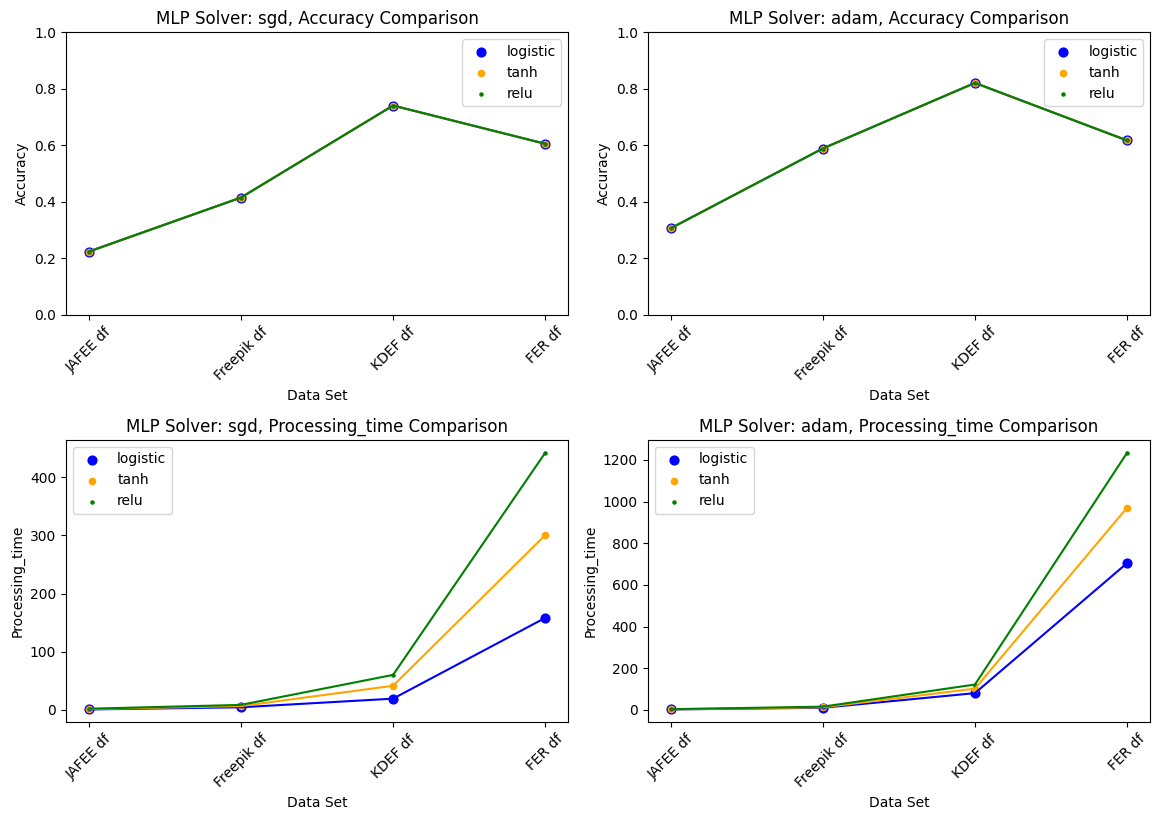



Figure 1: MLP scatter plot to compare accuracy and processing time regarding hyperparameters tuning
-----------------------------------------------------------------------------------------------------------------



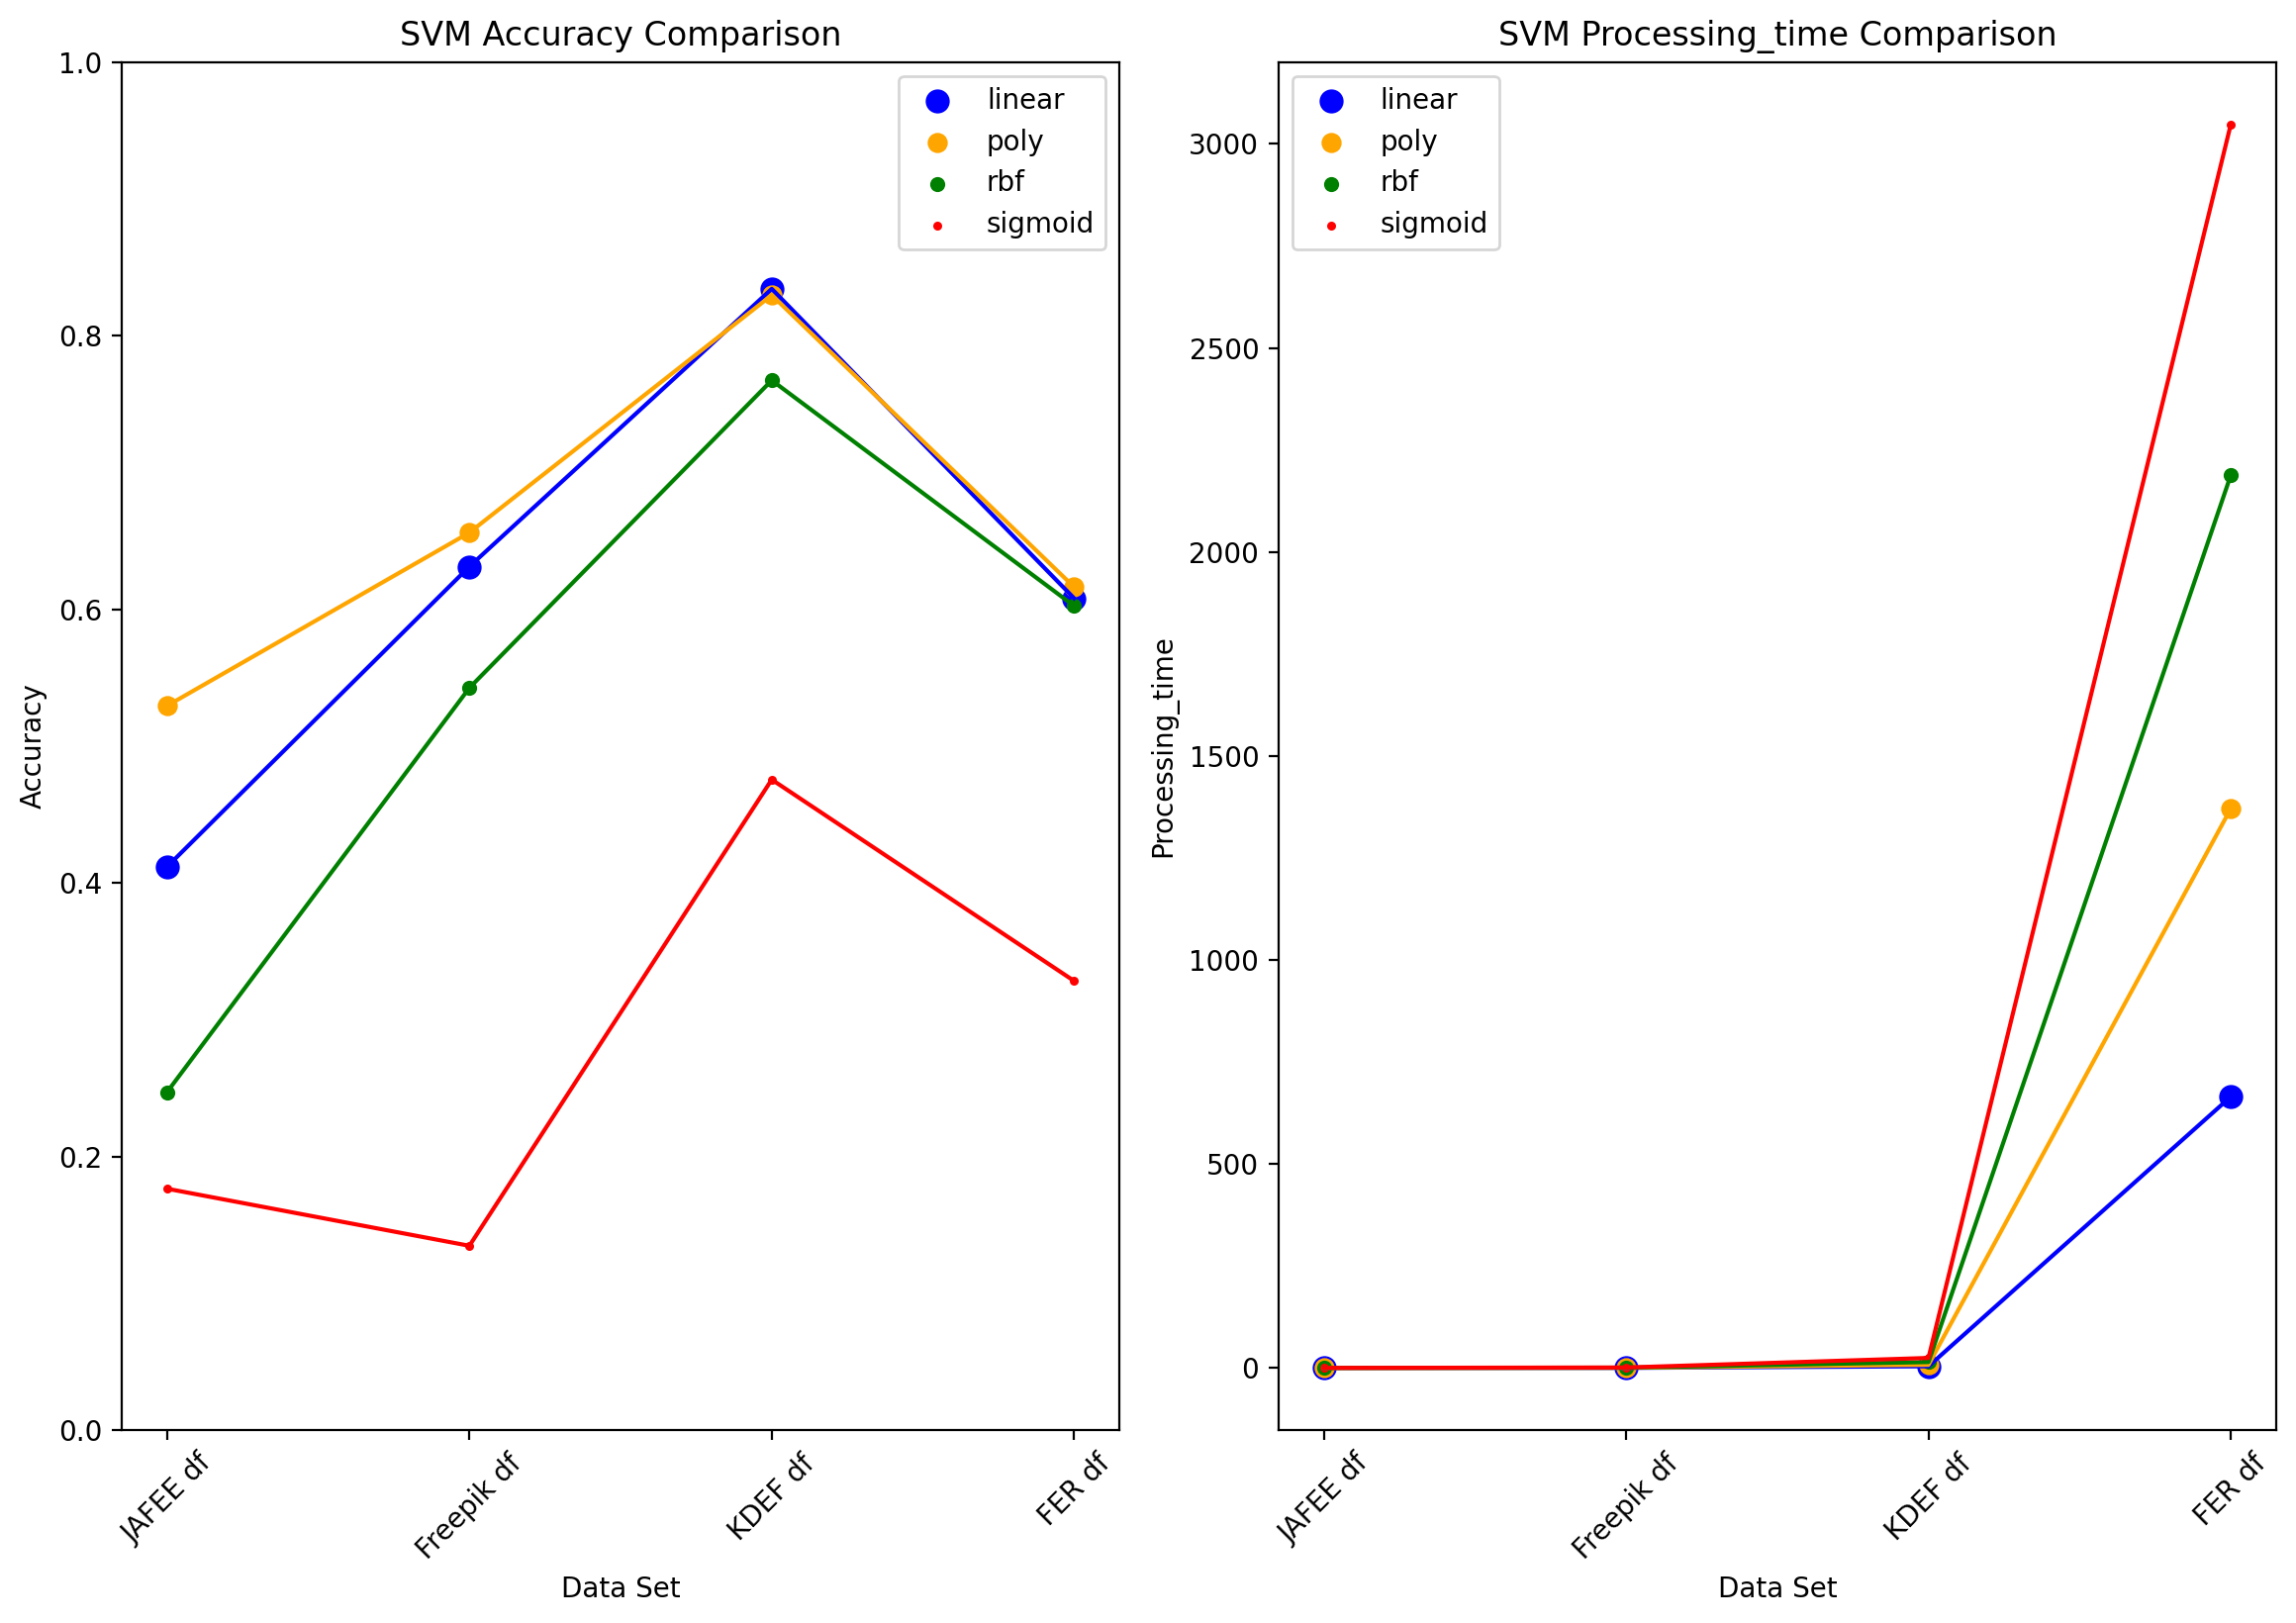



Figure 2: SVM scatter plot to compare accuracy and processing time regarding hyperparameters tuning
-----------------------------------------------------------------------------------------------------------------



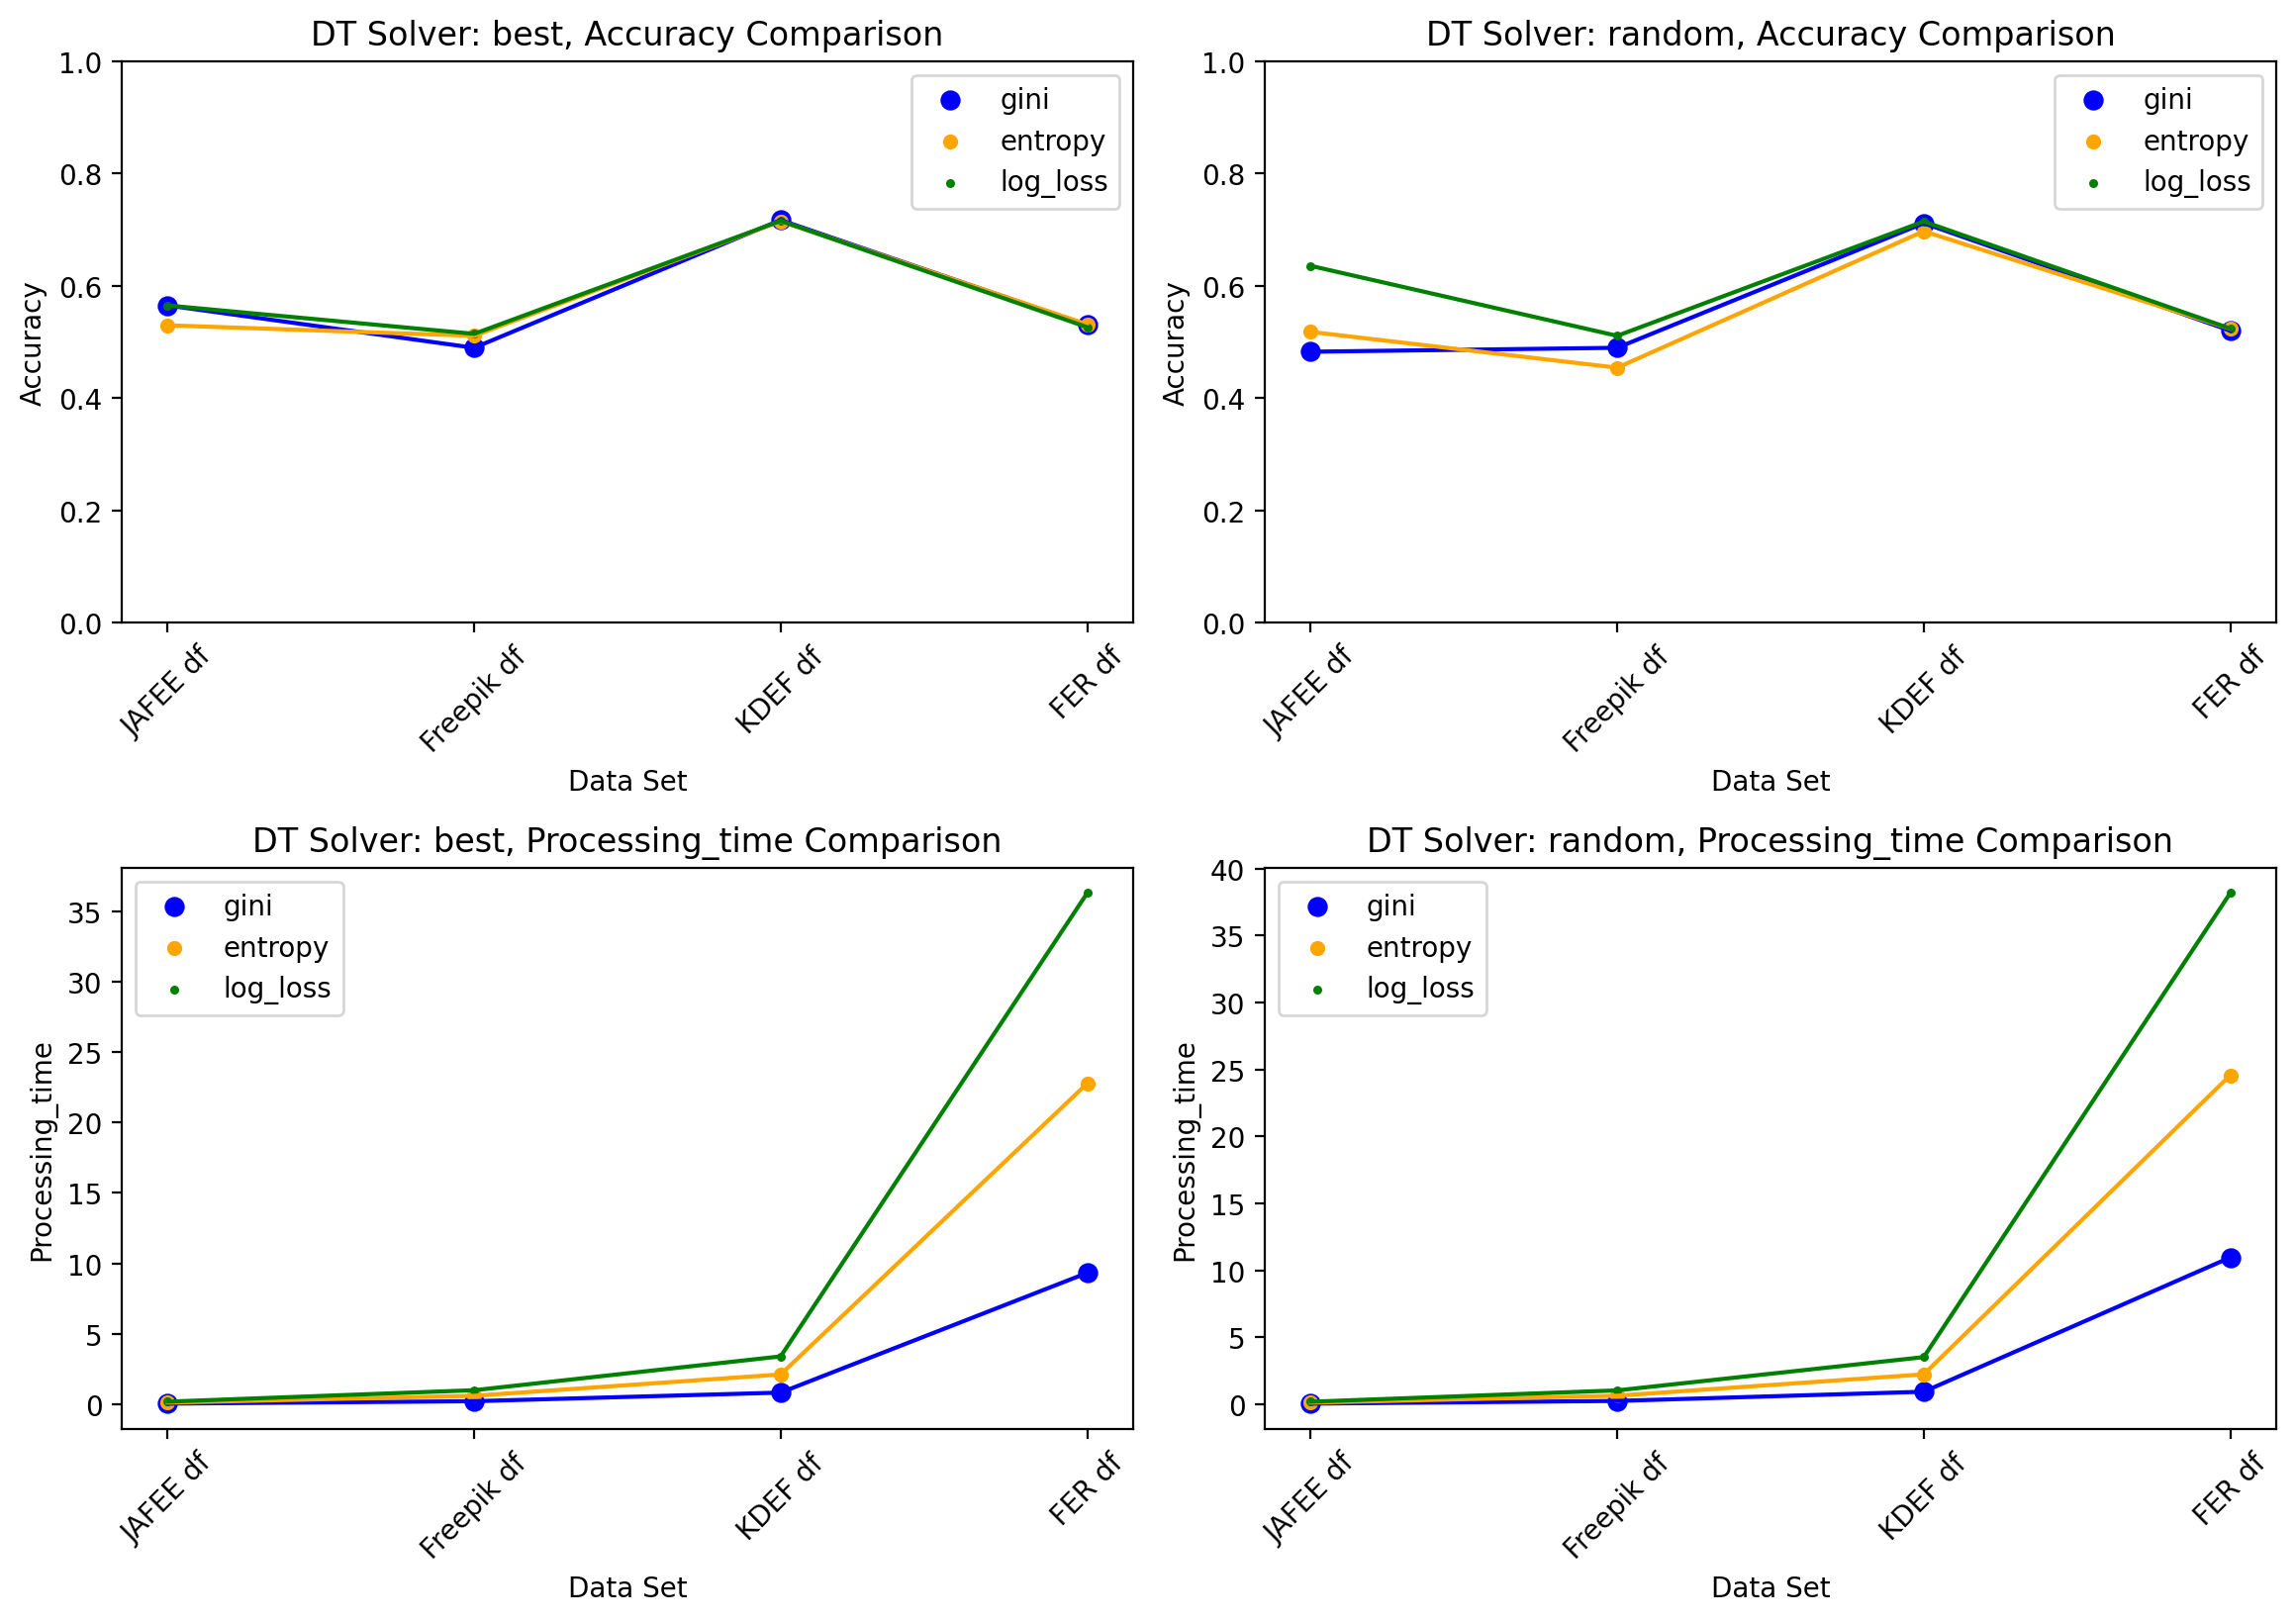



Figure 3: DT scatter plot to compare accuracy and processing time regarding hyperparameters tuning
-----------------------------------------------------------------------------------------------------------------



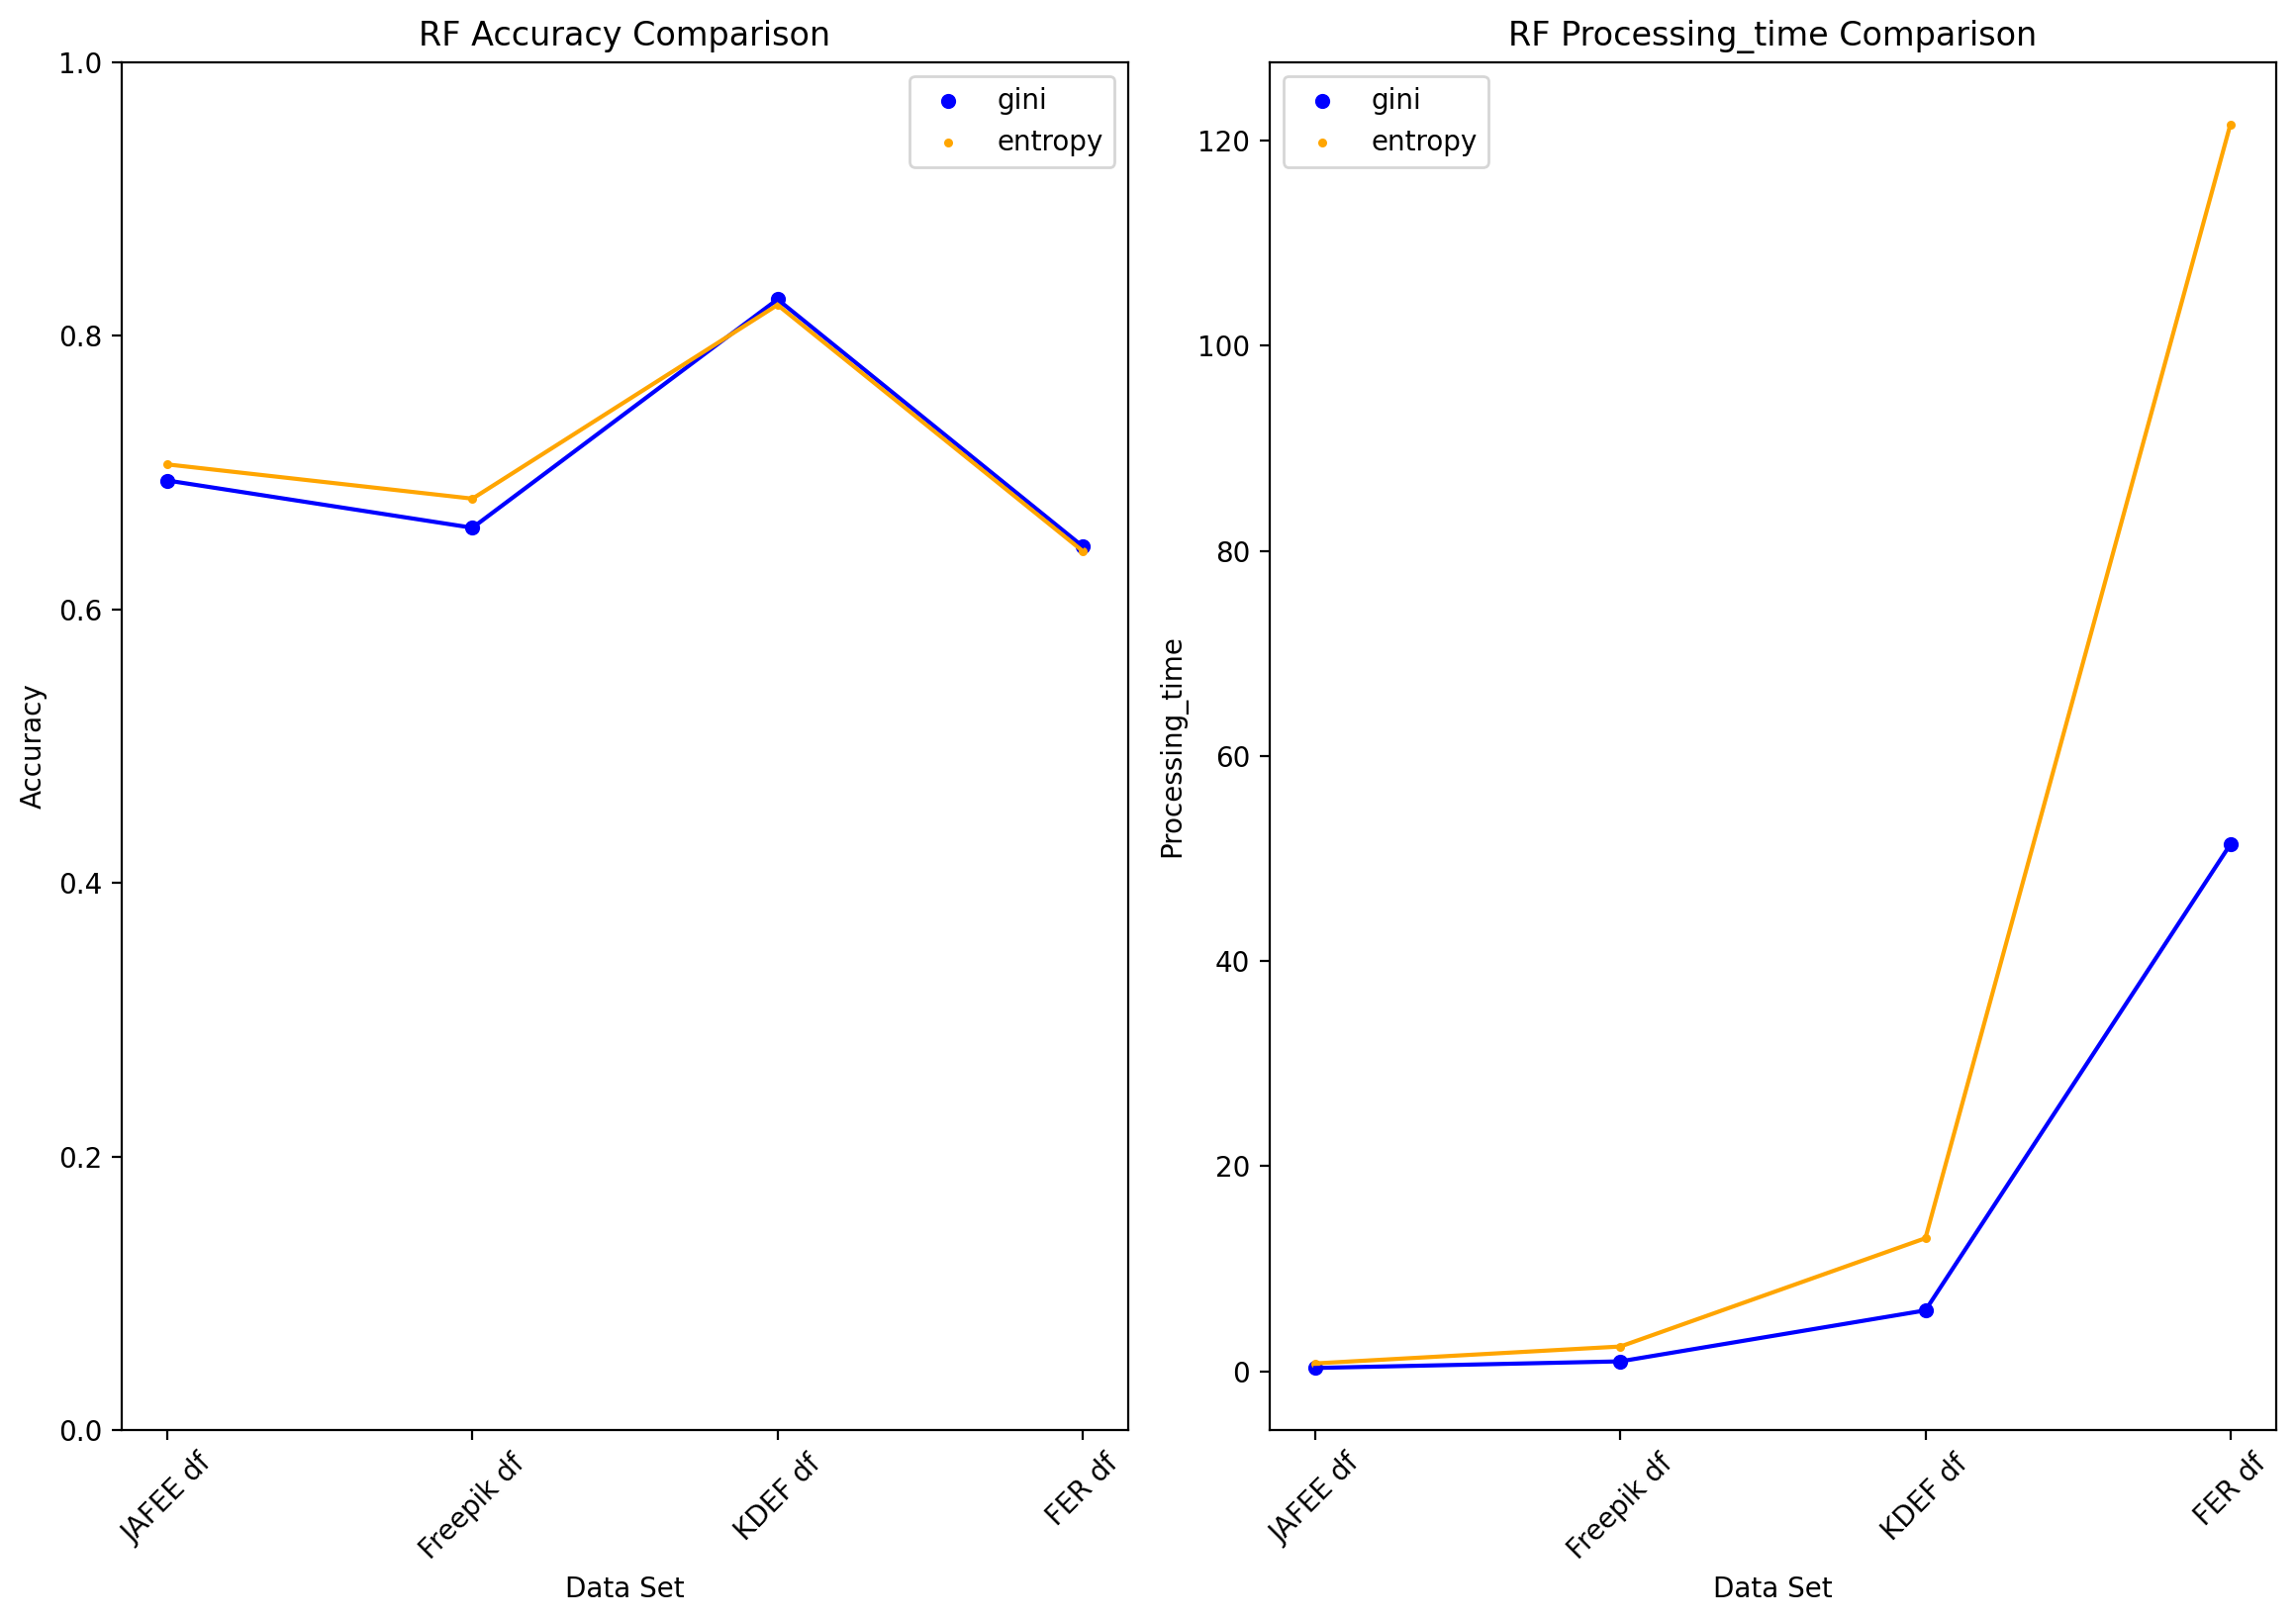



Figure 4: RF scatter plot to compare accuracy and processing time regarding hyperparameters tuning
-----------------------------------------------------------------------------------------------------------------



Table 1: MLP Evaluation Metrics regarding Hyperparameters
-----------------------------------------------------------------------------------------------------------------
      Data_set Solver Activation Hidden Iteration  Learning  Accuracy  \
0     JAFEE df    sgd   logistic    100       200     0.001  0.223529   
1     JAFEE df    sgd       tanh    100       200     0.001  0.223529   
2     JAFEE df    sgd       relu    100       200     0.001  0.223529   
3     JAFEE df   adam   logistic    100       200     0.001  0.305882   
4     JAFEE df   adam       tanh    100       200     0.001  0.305882   
5     JAFEE df   adam       relu    100       200     0.001  0.305882   
6   Freepik df    sgd   logistic    100       200     0.001  0.414894   
7   Freepik df    sgd     

In [ ]:
I_read_notification_carefully = 'No'
analysis_permission = True
plot_permission = True
show_save_merged_df_permission = True

if I_read_notification_carefully == 'Yes':
    emotion_folder_list = emotion_folder_list01()
    emotion_range = len(emotion_folder_list)
    test_size_input = .2
    path_input = '/content/drive/MyDrive/Face Kaggle/Vectors with 4 df/'
    main(path_input, emotion_range, test_size_input, analysis_permission, plot_permission, show_save_merged_df_permission)
else:
    print('*** Please Read Notification Carefully ***')

**==========================================================================================**

**Part 3: Results and Discussion**

**==========================================================================================**

Results of tuning models are mentioned in tables 1-4, in which evaluation metrics which have been mentioned in number 3 of section 3.5 of this research are described. As is shown the best results for each dataset implementation are selected based on 1) Accuracy number and then 2) Training and Testing time results. The rows of selected hyperparameters colored with light blue in tables 6-9. Figures show the MLP, SVM, DT and RF machine learning performance related to modeling FER based on mentioned vectorizing method related to most common FER dataset including what the author extracted and labeled by himself.

Considering values for accuracy and processing time in  table 1, shows that regarding predefined hyperparameters, combination of ‘Adam’ and ‘Logistic’ for ‘Solver’ and ‘Activation’ parameters respectively, results the best for all datasets and KDEF is the most appropriate dataset among others that have been studied regarding FER.

As shown in figure 1, changing the activation method has the same effect on accuracy while ‘Adam solver results in better accuracy rather than ‘Sgd’ (sigmoid)activation. The order of dataset names in horizontal dimension of graphs is based on the number of samples each of them has that is mentioned in table 5 of notebook “Face Emotion Recognition (FER)”. Accordingly, when it comes to delving into hyperparameters as they are, it is necessary to consider hyperparameters roles related to just one of mentioned dataset. In this report, the author tries to focus only on ‘Freepick’ dataset which also has the same number of samples for each considered human emotion. Considering processing time, generally as the number of samples gets higher the processing time gets bigger amount. Paying attention to just one dataset, proves that ‘logistic’ activation always consumes more computing resources which affect time directly and consumes more time in comparison other activation functions in MLP.

Considering values for accuracy and processing time in table 2, it is possible to admit that ‘Linear’ kernel plays a significant role to achieve the best accuracy in the least processing time. And as the same as MLP results KDEF is the best among other datasets.

From figure 2, it is possible to draw the same conclusion regarding processing time relation with number of samples as mentioned above. Considering accuracy plot, shows that even though in small samples, kernels show considerable performance, but as number of samples rocket up there is some kind of convergence. In contrast, the maximum processing time is always related to kernel in which ‘linear’ is shortest and ‘sigmoid’ as the same as MLP results is the longest time.

Considering values for accuracy and processing time in table 3, combination of ‘Gini’ as ‘Criterion’ and ‘Random’ as ‘Splitter’ shows the best results as their outputs; however, considering only accuracy for Freepik and JAFEE datasets is a bit against mentioned concept but thinking about processing time and applying this method in much more bigger datasets, proves that the drawn conclusion regarding accepting combination of ‘Gini’ and ‘Random’ is the best strategy in decision tree algorithm application. Also in this experiment, KDEF dataset shows the best results.

Regarding accuracy in DT as shown in figure 3, interestingly accuracy slightly decreased from ‘JAFEE’ dataset to ‘Freepik’; however, Freepick dataset includes around 700 samples and JAFEE around 200 samples in all criterion and solvers. It could be explained that ‘JAFEE’ samples are just zoomed in faces of several attendance in the same dimensions and resolutions which is completely in contrast with the approaches to select ‘Freepik’ dataset samples. All criterion performances have coalescence either for ‘best’ or ‘ramdom’ solver. Processing time naturally is increased by the number of samples and ‘log loss’ solver independently from difference dataset is the longest for both solvers.

Considering values for accuracy and processing time in table 4, shows evidence to consider ‘Gini’ as the best ‘Criterion’ in dealing with random forest ML algorithm; however, regarding JAFEE dataset, ‘Log Loss’ shows the highest accuracy while processing about four times longer.

RF performance regarding accuracy is the same for both criterion and lower for ‘Freepik’ dataset with before mentioned reasoning. Time processing behavior is the same as previous algorithms and in general it is admitted concluding ‘entropy’ criterion is more time-consuming procedure in comparison of ‘Gini’.

Considering all figures and tables shows that, accuracy number from deploying KDEF Dataset is always the highest one among other datasets from the minimum 0.136 in SVM algorithm regarding Freepik dataset, to the maximum 0.834 in SVM regarding KDEF.

To show advantages of the innovative figure mapping method, which is studies in this work, results from other figure mapping methos are shown in table 10 based on the same applied traditional methods in this research. The joint dataset of this research and literature is FER 2013 which is reported in [6]. Clearly, this research mapping method shows a paradigm shift in results. In another words, this research method improves the accuracy from minimum improvement of 7% for Full method in SVM and maximum improvement 24% for Siam method in MLP.



**==========================================================================================**

***End***

***Thank You***

**==========================================================================================**